# 1. Understanding the Data

In [235]:
#Import libraries needed
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

In [236]:
#import csv and read it. Data can be download in kaggle: https://www.kaggle.com/datasets/carrie1/ecommerce-data
df_raw = pd.read_csv("E_Commerce_Data.csv", encoding= 'unicode_escape')
df= df_raw.copy()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [237]:
#I check the data info, and see that there are missing value. There are also wrong data type in Invoice date
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [238]:
#This is the description of variables. We know that there are outlier in Quantity and Unit Price
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [239]:
#looking for duplicated data. Here, there are 4944 duplicated data.
df.duplicated().sum()

5268

In [240]:
#number of people cancell the order
df_cancelled_order = df[df['InvoiceNo'].apply(lambda x: x[0:1]=='C')]
df_cancelled_order['InvoiceNo'].count()

9288

# 2. Data Cleaning

In [241]:
#Change data type to right format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [242]:
#Know the max and min of InvoiceDate
print(min(df['InvoiceDate']))
print(max(df['InvoiceDate']))

2010-12-01 08:26:00
2011-12-09 12:50:00


In [243]:
#We need data in one year, from 2010-12-09 to 2011-12-09
df = df.loc[df['InvoiceDate']> '2010-12-09']

<AxesSubplot:xlabel='Quantity'>

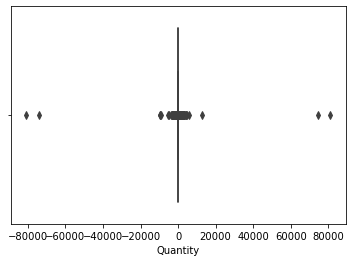

In [244]:
#Check outlier and erase it for Quantity and UnitPrice
sns.boxplot(x=df["Quantity"])

In [245]:
def get_IQR(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x,75)
    iqr=q3-q1
    lower_limit = q1 - (iqr*1.5)
    upper_limit = q3 + (iqr*1.5)
    return lower_limit, upper_limit

In [246]:
x,y = get_IQR(df['Quantity'])

In [247]:
df = df[(df['Quantity']>x) & (df['Quantity']<y)]

<AxesSubplot:xlabel='Quantity'>

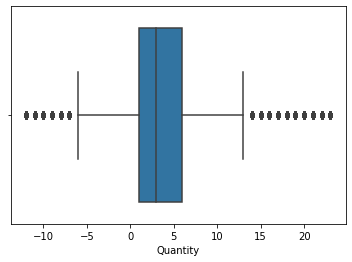

In [248]:
sns.boxplot(x=df["Quantity"])

In [249]:
#Erase minus data in quantity
df=df[df['Quantity']>0]

<AxesSubplot:xlabel='Quantity'>

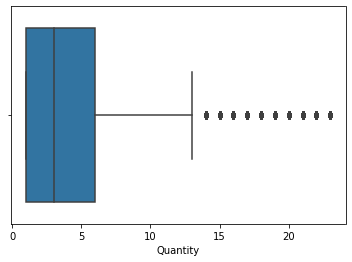

In [250]:
sns.boxplot(x=df["Quantity"])

<AxesSubplot:xlabel='UnitPrice'>

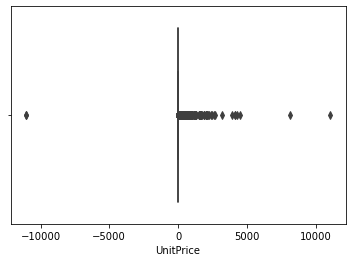

In [251]:
sns.boxplot(x=df["UnitPrice"])

In [252]:
x,y = get_IQR(df['UnitPrice'])

In [253]:
df = df[(df['UnitPrice']>x) & (df['UnitPrice']<y)]

<AxesSubplot:xlabel='UnitPrice'>

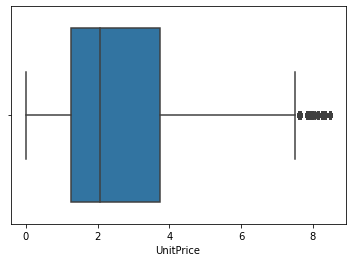

In [254]:
sns.boxplot(x=df['UnitPrice'])

In [255]:
#Erase minus data in UnitPrice
df=df[df['UnitPrice']>0]

In [256]:
#looking for duplicated data. Here, there are 4944 duplicated data.
df.duplicated().sum()

4644

In [257]:
#Erasing duplicated data
df = df.drop_duplicates(keep='last')

In [258]:
df.duplicated().sum()

0

In [259]:
#Remove data with Cancelled Order
df = df[df['InvoiceNo'].apply(lambda x: x[0:1]!='C')]

In [260]:
#Adding Total Payment variable
df['Total Payment'] = df['Quantity'] * df['UnitPrice']

In [261]:
#Adding variable of Hour, Days, Month, and Year
df['Hour'] = pd.DatetimeIndex(df['InvoiceDate']).hour
df['Day'] = pd.DatetimeIndex(df['InvoiceDate']).weekday
df['Month'] =pd.DatetimeIndex(df['InvoiceDate']).month
df['Year'] =pd.DatetimeIndex(df['InvoiceDate']).year

In [262]:
#Change day date to day name.
df['Day'] = df['Day'].map({0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday',6:'Sunday'})

# 3. Explanatory Data Analysis

In [263]:
#Descriptive data of numerical variable
df.describe()

,Quantity,UnitPrice,CustomerID,Total Payment,Hour,Month,Year
count,416346.000000,416346.000000,305882.000000,416346.000000,416346.000000,416346.000000,416346.000000
mean,4.993491,2.709221,15333.879914,10.901148,13.165855,7.409441,2010.956743
std,4.524308,1.945517,1701.194995,11.570871,2.422996,3.472646,0.203436
min,1.000000,0.001000,12347.000000,0.001000,6.000000,1.000000,2010.000000
25%,1.000000,1.250000,14036.000000,3.290000,11.000000,5.000000,2011.000000
50%,3.000000,2.080000,15249.000000,7.500000,13.000000,8.000000,2011.000000
75%,8.000000,3.750000,16818.000000,15.300000,15.000000,11.000000,2011.000000
max,23.000000,8.490000,18287.000000,194.810000,20.000000,12.000000,2011.000000


### How many orders per day?

In [264]:
#Here, we check the count of order by day.
df.groupby('Day')['InvoiceNo'].count().sort_values()

Day
Sunday       52050
Friday       63596
Wednesday    69606
Monday       73401
Tuesday      78525
Thursday     79168
Name: InvoiceNo, dtype: int64

### How many orders per month?

In [265]:
#Here, we check the count of order by Month.
df.groupby('Month')['InvoiceNo'].count().sort_values()

Month
2     21816
4     23550
8     27584
1     28478
3     28812
6     29040
5     29141
7     31658
12    38788
9     39567
10    48669
11    69243
Name: InvoiceNo, dtype: int64

### How many orders per hour?

In [266]:
#Here, we check the count of order by Hour
df.groupby('Hour')['InvoiceNo'].count()

Hour
6         1
7       146
8      6210
9     25077
10    34576
11    42939
12    60520
13    56811
14    51856
15    61314
16    44520
17    22761
18     6038
19     2897
20      680
Name: InvoiceNo, dtype: int64

### Who are the people with the highest order?

In [267]:
#We find the top 10 buyer 
df.groupby('CustomerID')['InvoiceNo'].count().sort_values(ascending = False).head(10)

CustomerID
17841.0    7137
14096.0    4592
14911.0    3988
12748.0    3658
14606.0    2393
15311.0    1803
13263.0    1610
15039.0    1299
13089.0    1205
14159.0    1153
Name: InvoiceNo, dtype: int64

### What product is the most bought?

In [268]:
#We check the most product bought
df.groupby('Description')['Quantity'].sum().sort_values(ascending = False).head(10)

Description
JUMBO BAG RED RETROSPOT               13746
ASSORTED COLOUR BIRD ORNAMENT         10559
WHITE HANGING HEART T-LIGHT HOLDER    10423
LUNCH BAG RED RETROSPOT               10276
LUNCH BAG  BLACK SKULL.                7993
LUNCH BAG CARS BLUE                    7761
LUNCH BAG APPLE DESIGN                 7397
JUMBO BAG PINK POLKADOT                7312
JAM MAKING SET PRINTED                 7175
LUNCH BAG SPACEBOY DESIGN              7149
Name: Quantity, dtype: int64

### How many is the total order by country?

In [269]:
#We check the most highest purchase by country
df.groupby('Country')['InvoiceNo'].count().sort_values(ascending = False).head(10)

Country
United Kingdom    386213
Germany             6515
France              6150
EIRE                5362
Spain               1889
Belgium             1505
Switzerland         1342
Portugal            1153
Norway               597
Italy                565
Name: InvoiceNo, dtype: int64

### How much is the total revenue by country?

In [270]:
#We check the most highest revenue by country
df.groupby('Country')['Total Payment'].sum().sort_values(ascending = False).head(10)

Country
United Kingdom    3994168.394
Germany            119973.930
France             103793.730
EIRE               101011.280
Spain               26695.760
Switzerland         25744.310
Belgium             25503.780
Portugal            17902.290
Norway              13082.860
Netherlands         11726.420
Name: Total Payment, dtype: float64

### How is the cancellation rate?

In [291]:
round(len(df_raw[df_raw['InvoiceNo'].apply(lambda x: x[0:1]=='C')])/len(df_raw)*100,2)

1.71

### How is the correlation of each variable?

In [ ]:
#See the Triangle Correlation Heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### How are the variance of each variable?

In [ ]:
#Search for the variance
var_Quantity = stat.variance(df['Quantity'])
var_UnitPrice = stat.variance(df['UnitPrice'])
var_Total_Payment = stat.variance(df['Total Payment'])
var_Hour = stat.variance(df['Hour'])

print('variance of quantity = ',var_Quantity)
print('variance of unit price = ',var_UnitPrice)
print('variance of total payment =',var_Total_Payment)
print('variance of hour',var_Hour)

### How are the coefficient of variation of each variable?

In [ ]:
#Search for the coefficient of variation
cov_Quantity = np.std(df['Quantity'])/np.mean(df['Quantity'])
cov_UnitPrice = np.std(df['UnitPrice'])/np.mean(df['UnitPrice'])
cov_Total_Payment = np.std(df['Total Payment'])/np.mean(df['UnitPrice'])
cov_Hour = np.std(df['Hour'])/np.mean(df['UnitPrice'])

print('coefficient of variation in quantity = ',cov_Quantity)
print('coefficient of variation in unit price = ',cov_UnitPrice)
print('coefficient of variation in total payment =',cov_Total_Payment)
print('coefficient of variation in hour',cov_Hour)

### How are the skewness of each variable?

In [ ]:
df[['Quantity','UnitPrice','UnitPrice','UnitPrice']].skew()

### How are the kurtosis of each variable?

In [ ]:
df[['Quantity','UnitPrice','UnitPrice','UnitPrice']].kurtosis()